In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lsd import DB
import lsd.bounds as b
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:

db = DB(os.environ['LSD_DB'])
rarange = [0,360]
decrange = [0,90]

bounds_xy = b.rectangle(0, 0 , 360, 90)
sky = db.query('select ra,dec,g,r from sdss where (20 < r) & (r < 22) & (g - r < 0.4)').fetch(bounds =[(bounds_xy, None)])

 [1279 el.]WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::>  203.75 sec


In [3]:
len(sky)

6675976

In [4]:
blue = sky[(20.0 < sky.r) & (sky.r <= 20.66)]
green = sky[(20.66 < sky.r) & (sky.r <=21.33)]
red = sky[(21.33 < sky.r) & (sky.r <= 22.0)]

In [60]:
xedges = np.arange(0,90,0.8)
yedges = np.arange(0,360,0.8)
B, xedges, yedges = np.histogram2d(blue.dec, blue.ra, bins = (xedges, yedges))
G, xedges, yedges = np.histogram2d(green.dec, green.ra, bins = (xedges, yedges))
R, xedges, yedges = np.histogram2d(red.dec, red.ra, bins = (xedges, yedges))


In [61]:
print type(B)

<type 'numpy.ndarray'>


In [62]:
All = np.dstack((R,G,B))

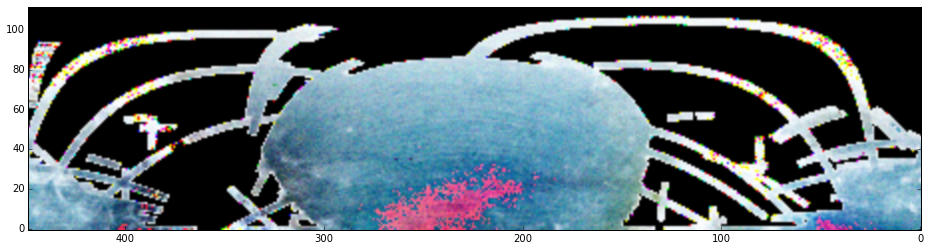

In [63]:
plt.figure(figsize=(16,6))
plt.imshow(All, interpolation = 'quadric')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

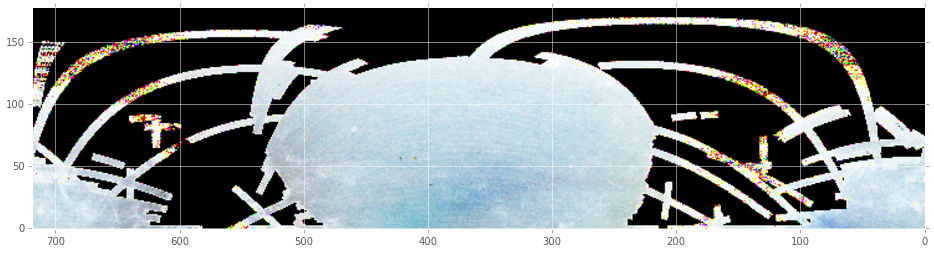

In [15]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(16,9))
    plt.imshow(All, interpolation = 'mitchell', filterrad = 3.0)
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
#plt.xlim(440,240)
#plt.ylim(0,100)

(0, 100)

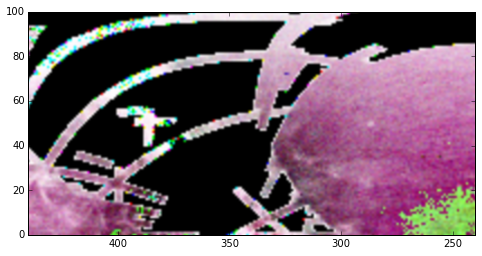

In [64]:
all_back = np.dstack((B,R,G))
plt.figure(figsize=(12,4))
plt.imshow(all_back, interpolation = 'quadric')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlim(440,240)
plt.ylim(0,100)
